# Practice Project - 5

# Titanic Project

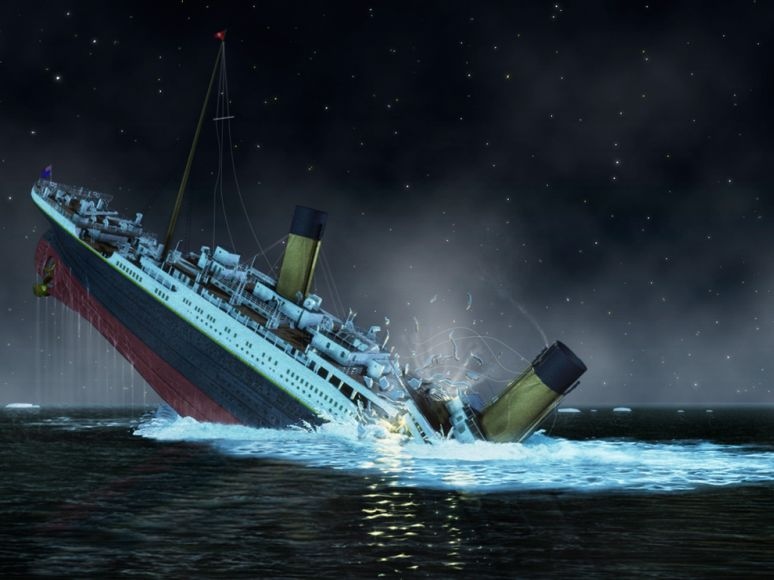

<b>Problem Statement:</b>

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


# About the Columns

<b>Pclass ---> Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)      
survival ---> Survival (0 = No; 1 = Yes)          
name ---> Name         
sex ---> Sex         
age ---> Age            
sibsp ---> Number of Siblings/Spouses Aboard            
parch ---> Number of Parents/Children Aboard            
ticket ---> Ticket Number             
fare ---> Passenger Fare (British pound)            
cabin ---> Cabin               
embarked ---> Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)              
boat ---> Lifeboat                   
body ---> Body Identification Number             
home.dest ---> Home/Destination</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5000,NaN,S


In [7]:
df.shape

(891, 12)

<b>Our dataset consists of 891 rows and 12 columns.</b>

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<b>Our dataset consists of the columns 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin' and 'Embarked'.               
The column 'Survived' is the target variable.</b>

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<b>The columns 'PassengerId', 'Survived', 'Pclass', 'SibSp' and 'Parch' consist of integer values.          
The columns 'Age' and 'Fare' consist of floating-point values.               
The columns 'Name', 'Sex','Ticket', 'Cabin' and 'Embarked' are of object datatype.<b> 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b> The column 'Age' has 177 null values, the column 'Cabin' has 687 null values and the column 'Embarked' has 2 null values.</b>

<AxesSubplot:>

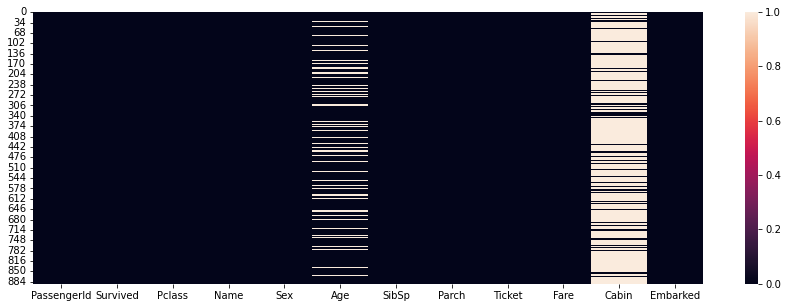

In [13]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull())

<b> In the heatmap, we can see the null values.</b>

# Descriptive Statistics

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<b> From the heatmap we can conclude that the data is imbalanced and has outliers.</b>

In [15]:
# Now, let's handle the null values

from sklearn.impute import SimpleImputer

SI = SimpleImputer( strategy='mean')

df['Age'] = SI.fit_transform(df['Age'].values.reshape(-1,1))

In [16]:
SI = SimpleImputer(strategy='most_frequent')

df['Cabin'] = SI.fit_transform(df['Cabin'].values.reshape(-1,1))

In [17]:
SI = SimpleImputer(strategy='most_frequent')

df['Embarked'] = SI.fit_transform(df['Embarked'].values.reshape(-1,1))

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:>

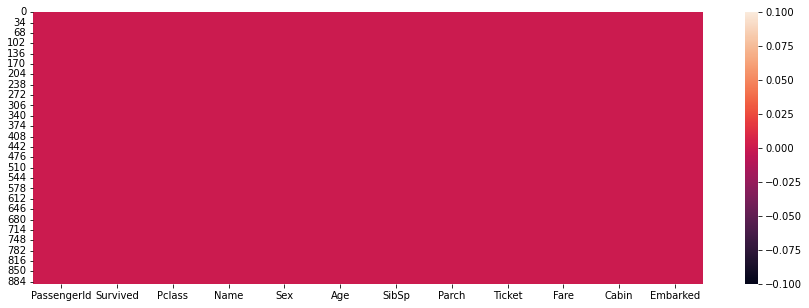

In [20]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull())

<b> Now, our dataset does'nt contain any null values.</b>

<b> The columns 'PassengerId', 'Name' and 'Ticket' are not helpful in our analysis. So, let's just drop these columns.</b>

In [21]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,B96 B98,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,B96 B98,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,B96 B98,S
887,1,1,female,19.000000,0,0,30.0000,B42,S
888,0,3,female,29.699118,1,2,23.4500,B96 B98,S
889,1,1,male,26.000000,0,0,30.0000,C148,C


<b> The columns 'Sex', 'Cabin' and 'Embarked' consist of non-numeric values.           
So, let's convert these columns into numeric values by using the Label Encoder.</b>

In [22]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

list1=['Sex','Cabin','Embarked']

for val in list1:
    df[val] = LE.fit_transform(df[val].astype(str))

In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,47,2
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,47,2
3,1,1,0,35.000000,1,0,53.1000,55,2
4,0,3,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,47,2
887,1,1,0,19.000000,0,0,30.0000,30,2
888,0,3,0,29.699118,1,2,23.4500,47,2
889,1,1,1,26.000000,0,0,30.0000,60,0


In [24]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int32
Embarked      int32
dtype: object

<b>Now, all the columns consist of numeric values.</b>

# Visualization of the Data

<b>Let's use countplot to visualize the frequency of the number of classes in all the columns.<b>

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

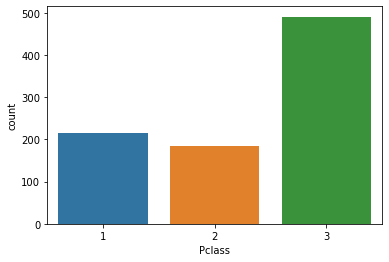

In [25]:
print(df['Pclass'].value_counts())

sns.countplot(df['Pclass'])

<b> From the above countplot, we can conclude that there are 3 passenger classes, i.e., 1=class 1, 2=class 2 and 3=class 3.</b> 

<b>The number of passengers who travelled in class 1 is 216, class 2 is 184 and class 3 is 491.</b>

1    577
0    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

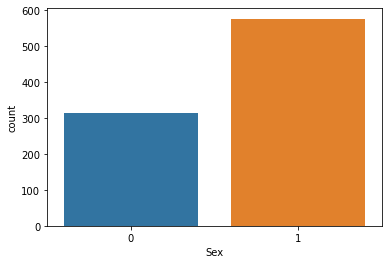

In [26]:
print(df['Sex'].value_counts())

sns.countplot(df['Sex'])

<b> From the above countplot, we can conclude that, there were 577 male passengers and 314 female passengers.</b>

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64


<AxesSubplot:xlabel='Age', ylabel='count'>

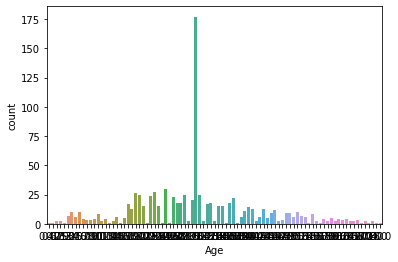

In [27]:
print(df['Age'].value_counts())

sns.countplot(df['Age'])

<b> From the above countplot, we can conclude that, majority of the passengers were around 30 years old.</b>

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

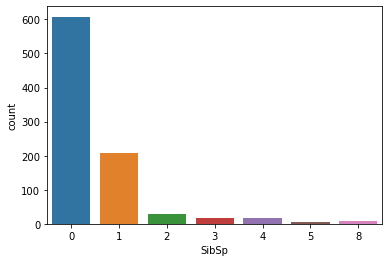

In [28]:
print(df['SibSp'].value_counts())

sns.countplot(df['SibSp'])

<b> From the above countplot, we can conclude that,          
608 passengers had no Siblings/Spouses aboard,            
209 passengers had 1 Sibling/Spouses aboard,          
28 passengers had 2 Siblings/Spouses aboard,           
18 passengers had 4 Siblings/Spouses aboard,            
16 passengers had 3 Siblings/Spouses aboard,            
7 passengers had 8 Siblings/Spouses aboard and                
5 passengers had 5 Siblings/Spouses aboard.</b> 

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

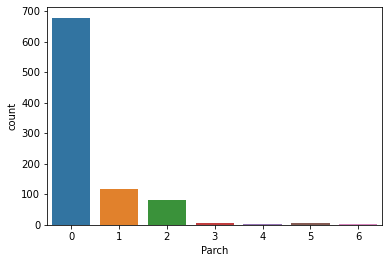

In [29]:
print(df['Parch'].value_counts())

sns.countplot(df['Parch'])

<b> From the above countplot, we can conclude that,          
678 passengers had no Parents/Children aboard,            
118 passengers had 1 Parents/Children aboard,          
80 passengers had 2 Parents/Children aboard,           
5 passengers had 4 Parents/Children aboard,            
5 passengers had 3 Parents/Children aboard,            
4 passengers had 8 Parents/Children aboard and                
1 passenger had 5 Parents/Children aboard.</b> 

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


<AxesSubplot:xlabel='Fare', ylabel='count'>

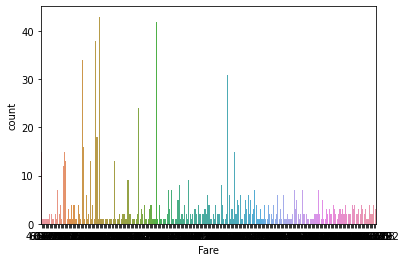

In [30]:
print(df['Fare'].value_counts())

sns.countplot(df['Fare'])

<b> From the above countplot, we can conclude that, 43 passengers paid a fare of 8 dollars and 42 passengers paid a fare of 13 dollars.</b>

47     691
145      4
63       4
62       3
142      3
      ... 
124      1
76       1
72       1
125      1
60       1
Name: Cabin, Length: 147, dtype: int64


<AxesSubplot:xlabel='Cabin', ylabel='count'>

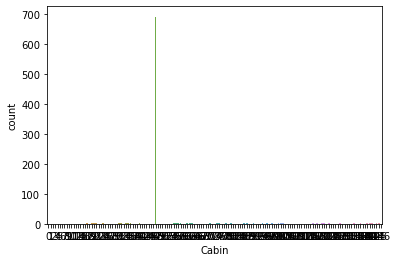

In [31]:
print(df['Cabin'].value_counts())

sns.countplot(df['Cabin'])

<b> From the above countplot, we can conclude that a majority of passengers, i.e., 691 passengers travelled in Cabin 47.</b>    

2    646
0    168
1     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

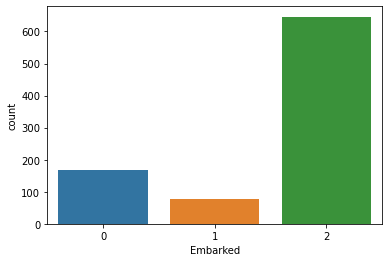

In [32]:
print(df['Embarked'].value_counts())

sns.countplot(df['Embarked'])

<b> From the above countplot, we can conclude that, there are 3 classes in the column "Embarked", i.e., 0=Cherbourg, 1=Queenstown and 2=Southampton.</b>       

<b> 168 passengers embarked from the port Cherbourg,          
    77 passengers embarked from the port Queenstown and              
    646 passengers embarked from the port Southampton.</b>

In [33]:
# Let's check the unique values present in the label

df['Survived'].unique()

array([0, 1], dtype=int64)

<b>As we can see, the label consists of two unique values, i.e., 0 and 1</b>

In [34]:
# Let's get a count of the unique values present in the label

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<b> Here, 0 stands for not-survived and 1 stands for survived.</b>

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

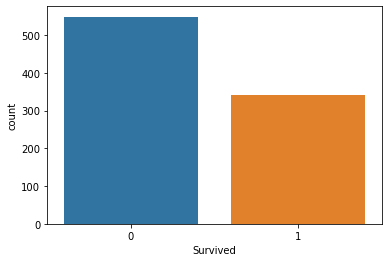

In [35]:
print(df['Survived'].value_counts())

sns.countplot(df['Survived'])

<b> From the above countplot, we can conclude that, 549 passengers did not survive and 342 passengers survived.</b>

<b> We can see that the data in the label is imbalanced. So, let's just balance it.</b>

In [36]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,47,2
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,47,2
3,1,1,0,35.000000,1,0,53.1000,55,2
4,0,3,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,47,2
887,1,1,0,19.000000,0,0,30.0000,30,2
888,0,3,0,29.699118,1,2,23.4500,47,2
889,1,1,1,26.000000,0,0,30.0000,60,0


In [37]:
x = df.iloc[:,1:9]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,47,2
1,1,0,38.000000,1,0,71.2833,81,0
2,3,0,26.000000,0,0,7.9250,47,2
3,1,0,35.000000,1,0,53.1000,55,2
4,3,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,47,2
887,1,0,19.000000,0,0,30.0000,30,2
888,3,0,29.699118,1,2,23.4500,47,2
889,1,1,26.000000,0,0,30.0000,60,0


In [38]:
y = df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [39]:
from imblearn.over_sampling import SMOTE

smt= SMOTE(random_state=0, k_neighbors=1)

x,y = smt.fit_resample(x,y)

y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

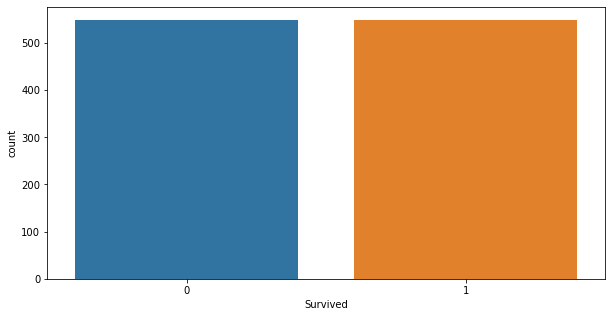

In [40]:
plt.figure(figsize = (10,5))

sns.countplot(y)

<b> Now, our dataset is balanced.</b>

# Correlation using Heatmap

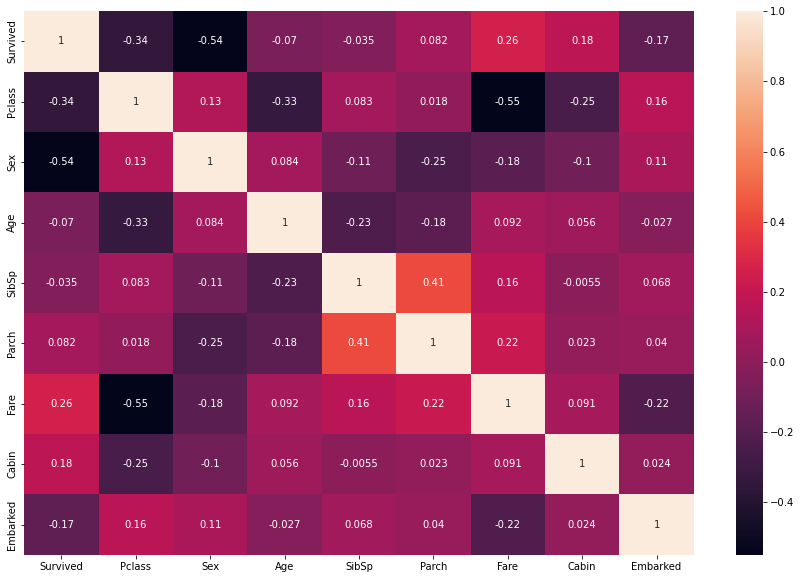

In [41]:
heatmap = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(heatmap,annot=True)
plt.show()

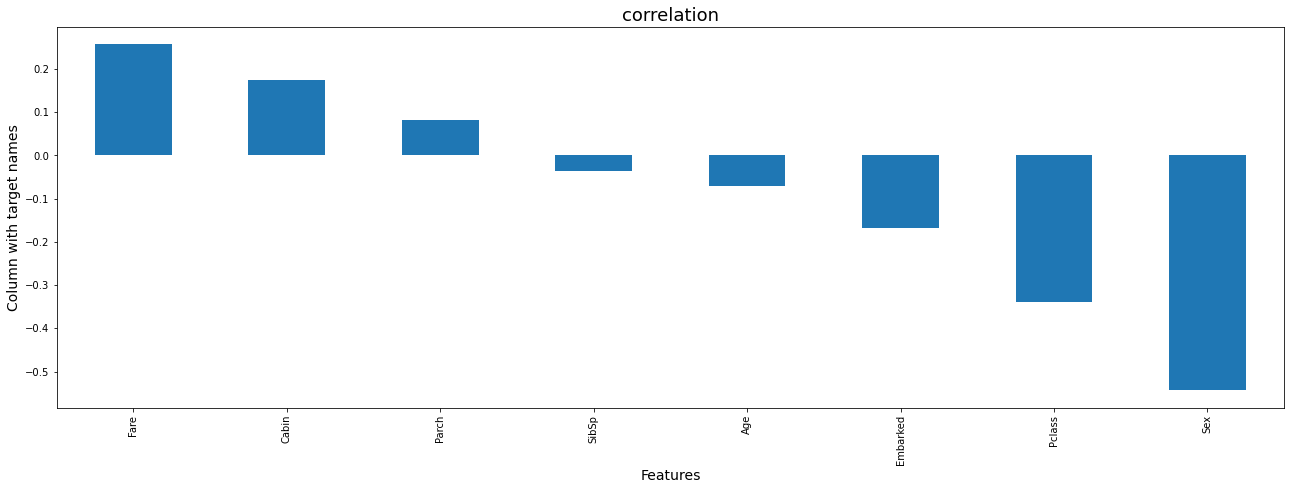

In [42]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Column with target names', fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

<b> The column 'Parch' has 8% correlation with the target column.           
The column 'Fare' has 26% correlation with the target column.      
The column 'Cabin' has 18% correlation with the target column.</b>

<b>The columns 'Pclass', 'Sex', 'Age', 'SibSp' and 'Embarked' have negative correlation with the target column.</b>

<b>Max. correlation: 'Fare'</b>

In [43]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

<b> Since the columns 'SibSp', 'Parch', 'Fare' and 'Cabin' have very high skewness, let's apply log transformation technique.</b>

In [44]:
from sklearn.preprocessing import power_transform

x_new = power_transform(x)

x = pd.DataFrame(x_new, columns=x.columns)

x.skew()

Pclass     -0.336706
Sex        -0.235073
Age         0.033451
SibSp       0.863894
Parch       1.230813
Fare       -0.031699
Cabin       0.260442
Embarked   -0.886275
dtype: float64

In [45]:
x.skew().sort_values()

Embarked   -0.886275
Pclass     -0.336706
Sex        -0.235073
Fare       -0.031699
Age         0.033451
Cabin       0.260442
SibSp       0.863894
Parch       1.230813
dtype: float64

<b>Here, are the columns which do not lie in the range of +/-0.5</b>

* <b>Embarked</b>             
* <b>Cabin</b>          
* <b>Sex</b>           
* <b>SibSp</b>          
* <b>Parch</b>

In [46]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked'>

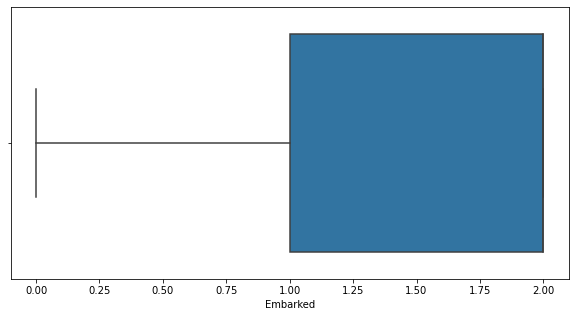

In [47]:
plt.figure(figsize = (10,5))

sns.boxplot(df['Embarked'])

<AxesSubplot:xlabel='Cabin'>

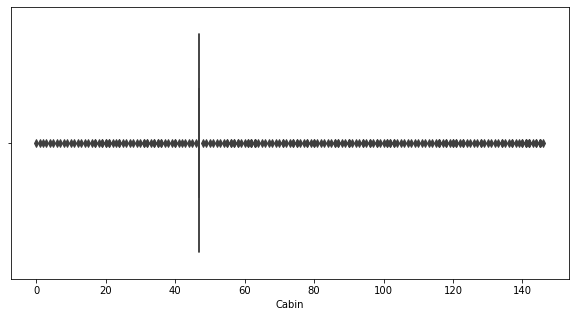

In [48]:
plt.figure(figsize = (10,5))

sns.boxplot(df['Cabin'])

<AxesSubplot:xlabel='Sex'>

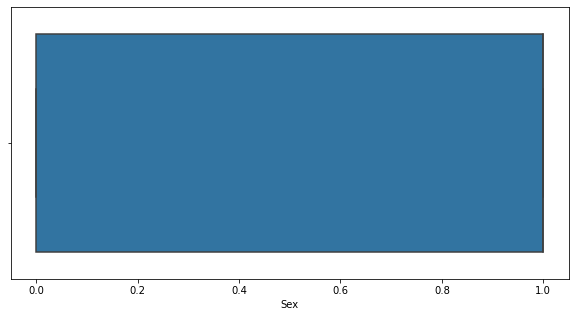

In [49]:
plt.figure(figsize = (10,5))

sns.boxplot(df['Sex'])

<AxesSubplot:xlabel='SibSp'>

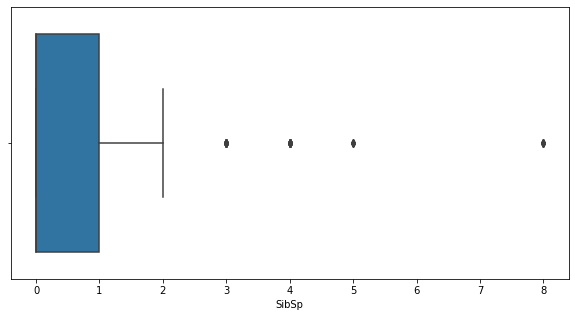

In [50]:
plt.figure(figsize = (10,5))

sns.boxplot(df['SibSp'])

<AxesSubplot:xlabel='Parch'>

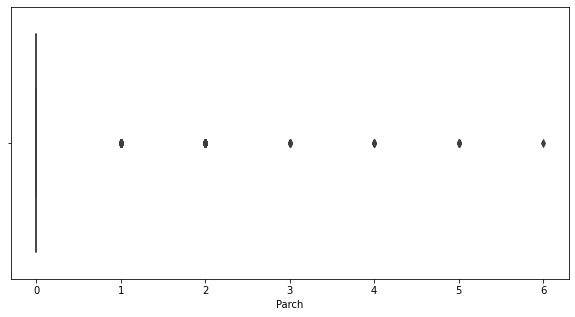

In [51]:
plt.figure(figsize = (10,5))

sns.boxplot(df['Parch'])

<b>By looking at the boxplots above, we can conclude that outliers are present in the columns 'Cabin', 'SibSp' and 'Parch'.</b>

In [52]:
# Removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(891, 9)
(786, 9)


In [53]:
print("Old DataFrame", df.shape)
print("New DataFrame", df_new.shape)
print("total_dropped_rows", df.shape[0] - df_new.shape[0])

Old DataFrame (891, 9)
New DataFrame (786, 9)
total_dropped_rows 105


# Percentage data loss

In [54]:
loss_percent = (768-716)/768*100
print(loss_percent, '%')

6.770833333333333 %


<b>Since, the data loss is less than 7%, we can proceed further.</b>

In [55]:
df = df_new

df.shape

(786, 9)

In [56]:
#3333333333333333333

In [57]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,47,2
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,47,2
3,1,1,0,35.000000,1,0,53.1000,55,2
4,0,3,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,47,2
887,1,1,0,19.000000,0,0,30.0000,30,2
888,0,3,0,29.699118,1,2,23.4500,47,2
889,1,1,1,26.000000,0,0,30.0000,60,0


# Scatter Plot

<AxesSubplot:title={'center':'Comparison between Pclass and Sex'}, xlabel='Pclass', ylabel='Sex'>

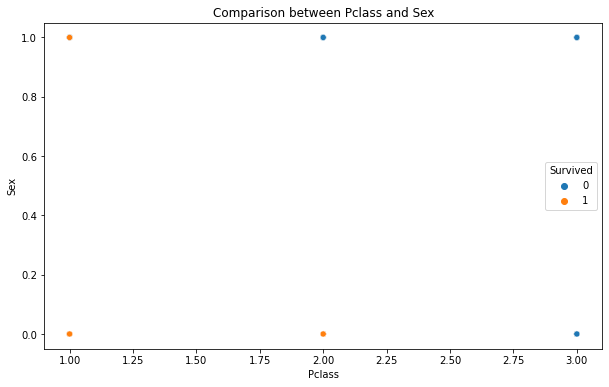

In [58]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Pclass and Sex')
sns.scatterplot(df['Pclass'], df['Sex'], hue=df["Survived"])

<b> This plot gives the comparison between Pclass and Sex. As we can see,        
in class 1, both male and female passengers survived,           
in class 2 only female passengers survived, and        
in class 3 both male and female passengers did not survive.</b>

<AxesSubplot:title={'center':'Comparison between Sex and Age'}, xlabel='Sex', ylabel='Age'>

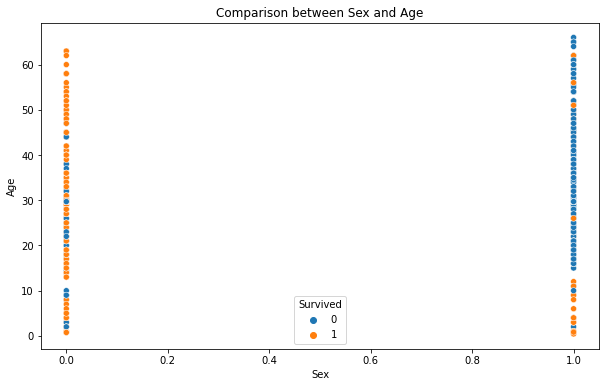

In [59]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Sex and Age')
sns.scatterplot(df['Sex'], df['Age'], hue=df["Survived"])

<b>This plot gives the comparison between Sex and Age. As we can see, irrespective of the age, mostly female passengers survived.</b>

<AxesSubplot:title={'center':'Comparison between Age and SibSp'}, xlabel='Age', ylabel='SibSp'>

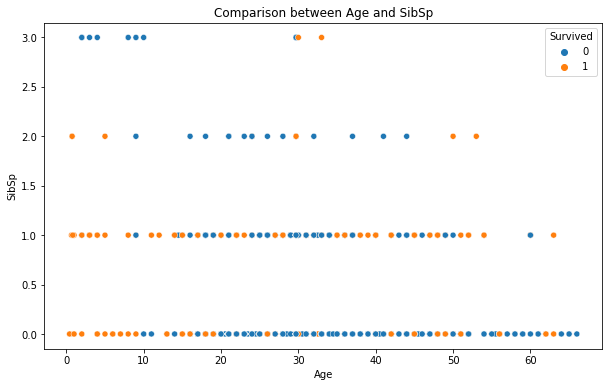

In [60]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Age and SibSp')
sns.scatterplot(df['Age'], df['SibSp'], hue=df["Survived"])

<b>This plot gives the comparison between Age and SibSp. As we can see, majority of the passengers between the age of 25 to 40, who had no siblings/spouses survived.</b>

<AxesSubplot:title={'center':'Comparison between SibSp and Parch'}, xlabel='SibSp', ylabel='Parch'>

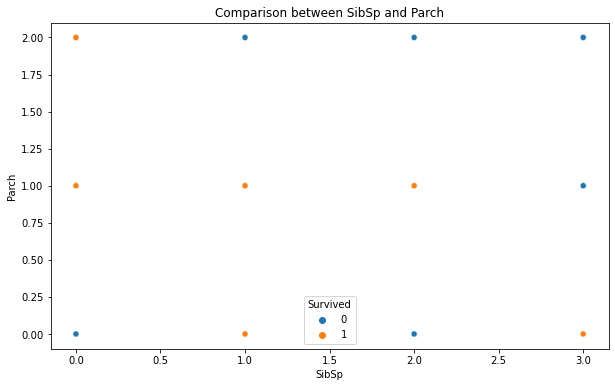

In [61]:
plt.figure(figsize=[10,6])
plt.title('Comparison between SibSp and Parch')
sns.scatterplot(df['SibSp'], df['Parch'], hue=df["Survived"])

<b>This plot gives the comparison between SibSp and Parch. As we can see,       
the passengers with no siblings/spouses and no parents/children aboard survived,            
the passengers with 1 siblings/spouses and 2 parents/children aboard survived, and        
the passengers with 2 siblings/souses survived and with 0 and 2 parents/children survived,          
the passengers with 3 siblings/spouses and with 1 and 2 parents/siblings survived.</b>

<AxesSubplot:title={'center':'Comparison between Parch and Fare'}, xlabel='Parch', ylabel='Fare'>

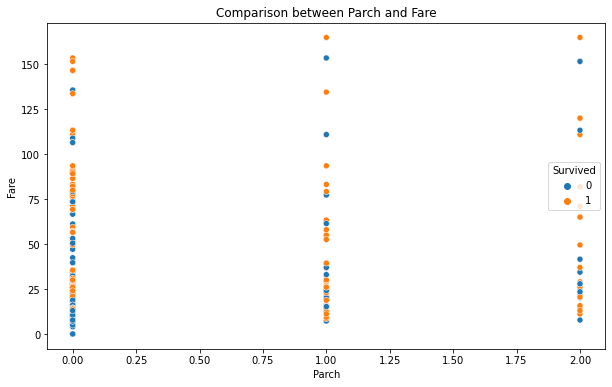

In [62]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Parch and Fare')
sns.scatterplot(df['Parch'], df['Fare'], hue=df["Survived"])

<b> This plot gives the comparison between Parch and Fare. As we can see, majority of the passengers with no parents/children and who paid the fare between 75 and 95 dollars survived.</b>

<AxesSubplot:title={'center':'Comparison between Fare and Cabin'}, xlabel='Fare', ylabel='Cabin'>

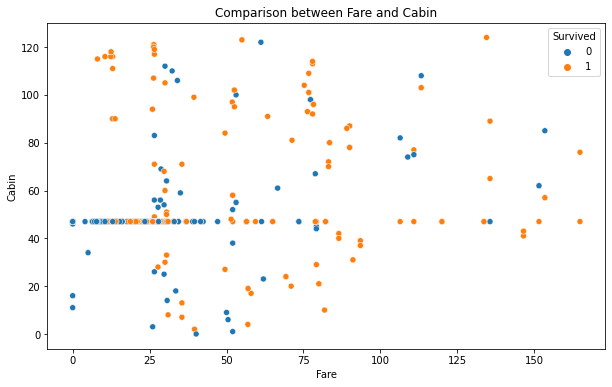

In [63]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Fare and Cabin')
sns.scatterplot(df['Fare'], df['Cabin'], hue=df["Survived"])

<b> This plot gives the comparison between Fare and Cabin. As we can see, irrespective of the cabin and fare, the number of passengers who survived is evenly distributed.</b>

<AxesSubplot:title={'center':'Comparison between Cabin and Embarked'}, xlabel='Cabin', ylabel='Embarked'>

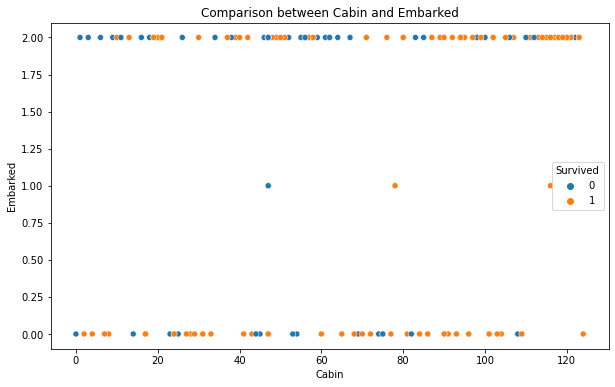

In [64]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Cabin and Embarked')
sns.scatterplot(df['Cabin'], df['Embarked'], hue=df["Survived"])

<b>This plot gives the comparison between Parch and Fare. As we can see, the passengers who boarded from Southampton and were in cabins 85-125 survived.</b>

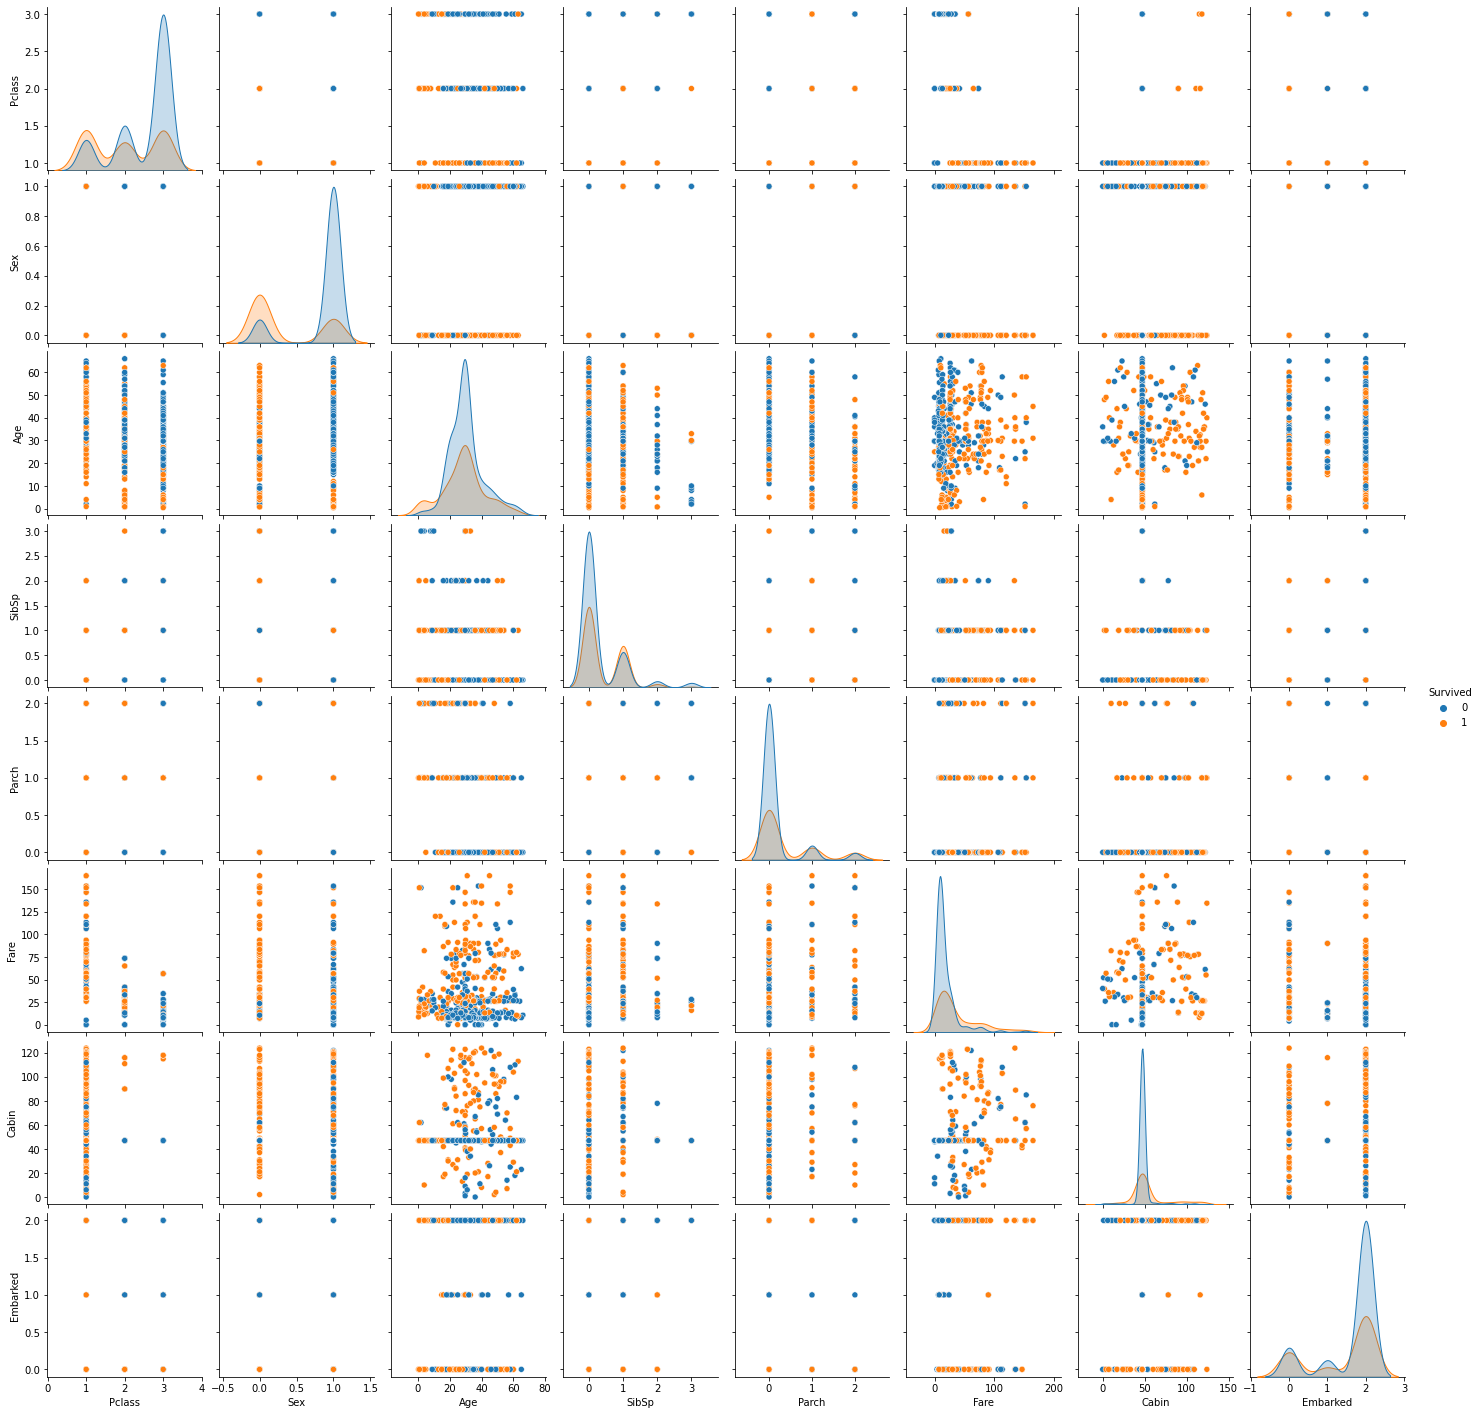

In [65]:
sns.pairplot(df, hue="Survived")

<b>This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'Survived'.</b>

<b>From this pairplot we can observe that the correlation exists between two variables and on the diagonal we can see distribution plotting.</b>

In [66]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
x = SC.fit_transform(x)
x

array([[ 0.92893299,  0.8894891 , -0.5175252 , ..., -0.95736809,
        -0.21153783,  0.66807999],
       [-1.38121864, -1.12424087,  0.68887085, ...,  1.23196787,
         1.20044316, -1.67805404],
       [ 0.92893299, -1.12424087, -0.20702571, ..., -0.86898983,
        -0.21153783,  0.66807999],
       ...,
       [-1.38121864, -1.12424087, -0.04986437, ...,  1.3230467 ,
        -0.21153783, -1.67805404],
       [-0.40994768, -1.12424087, -0.75546748, ...,  0.30036447,
        -0.21153783,  0.66807999],
       [ 0.92893299, -1.12424087,  0.07427867, ..., -0.87474921,
        -0.21153783, -1.0316859 ]])

In [67]:
x.shape

(1098, 8)

In [68]:
y.shape

(1098,)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [70]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
svc = SVC()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()
gnb = GaussianNB()
ada = AdaBoostClassifier()

In [71]:
model = [lr, dtc, svc, rfc, knc, gnb, ada]

maxAccu = 0
bestRS = 0

for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best Accuracy score is', maxAccu , 'on random state', bestRS)

Best Accuracy score is 0.8484848484848485 on random state 57


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=46, test_size=.30)

# Logistic Regression

In [73]:
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test,pred)
lr_acc

print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[141  32]
 [ 30 127]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       173
           1       0.80      0.81      0.80       157

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

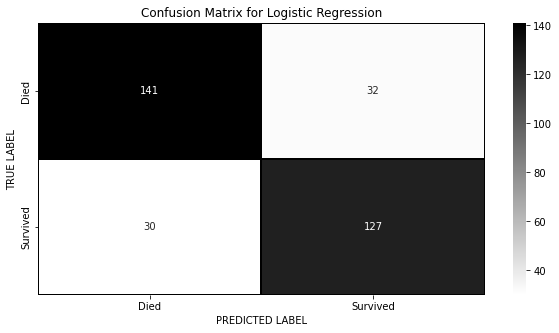

In [74]:
# Let's plot confusion matrix for Logistic Regression

cm = confusion_matrix(y_test,pred)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="binary", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
for i in range(4,10):
    lr_accscore = cross_val_score(lr, x, y, cv=i)
    lr_cvscore = lr_accscore.mean()
    print("At cv=",i)
    print("Accuracy score is:", lr_acc*100)
    print("Cross Validation score is:", lr_cvscore*100)

At cv= 4
Accuracy score is: 81.21212121212122
Cross Validation score is: 80.60683477106835
At cv= 5
Accuracy score is: 81.21212121212122
Cross Validation score is: 80.33540888335409
At cv= 6
Accuracy score is: 81.21212121212122
Cross Validation score is: 80.41894353369763
At cv= 7
Accuracy score is: 81.21212121212122
Cross Validation score is: 80.5137537621614
At cv= 8
Accuracy score is: 81.21212121212122
Cross Validation score is: 80.60602454247329
At cv= 9
Accuracy score is: 81.21212121212122
Cross Validation score is: 80.327868852459


In [77]:
cvscore = cross_val_score(lr, x, y, cv=5).mean()
print(f"Accuracy= {lr_acc*100}, cross_val_score= {lr_cvscore*100} & difference= {(lr_acc*100)-(lr_cvscore*100)}")

Accuracy= 81.21212121212122, cross_val_score= 80.327868852459 & difference= 0.8842523596622129


# Decision Tree Classifier

In [78]:
dtc.fit(x_train,y_train)
pred = dtc.predict(x_test)
dtc_acc = accuracy_score(y_test,pred)
dtc_acc

print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[143  30]
 [ 26 131]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       173
           1       0.81      0.83      0.82       157

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

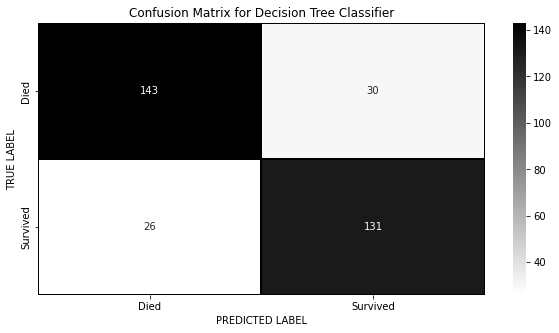

In [79]:
# Let's plot confusion matrix for Decision Tree Classifier

cm = confusion_matrix(y_test,pred)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="binary", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

In [80]:
for i in range(4,10):
    dtc_accscore = cross_val_score(dtc, x, y, cv=i)
    dtc_cvscore = dtc_accscore.mean()
    print("At cv=",i)
    print("Accuracy score is:", dtc_acc*100)
    print("Cross Validation score is:", dtc_cvscore*100)

At cv= 4
Accuracy score is: 83.03030303030303
Cross Validation score is: 83.61479761114798
At cv= 5
Accuracy score is: 83.03030303030303
Cross Validation score is: 82.52469904524699
At cv= 6
Accuracy score is: 83.03030303030303
Cross Validation score is: 81.14754098360656
At cv= 7
Accuracy score is: 83.03030303030303
Cross Validation score is: 82.51907328340451
At cv= 8
Accuracy score is: 83.03030303030303
Cross Validation score is: 83.43449169575796
At cv= 9
Accuracy score is: 83.03030303030303
Cross Validation score is: 82.14936247723132


In [81]:
cvscore = cross_val_score(dtc, x, y, cv=8).mean()
print(f"Accuracy= {dtc_acc*100}, cross_val_score= {dtc_cvscore*100} & difference= {(dtc_acc*100)-(dtc_cvscore*100)}")

Accuracy= 83.03030303030303, cross_val_score= 82.14936247723132 & difference= 0.88094055307171


# Support Vector Classifier

In [82]:
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
svc_acc = accuracy_score(y_test,pred)
svc_acc

print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[149  24]
 [ 29 128]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       173
           1       0.84      0.82      0.83       157

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Classifier')

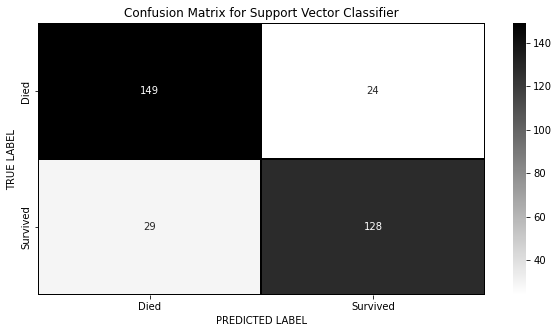

In [83]:
# Let's plot confusion matrix for Support Vector Classifier

cm = confusion_matrix(y_test,pred)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="binary", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Classifier')

In [84]:
for i in range(4,10):
    svc_accscore = cross_val_score(svc, x, y, cv=i)
    svc_cvscore = svc_accscore.mean()
    print("At cv=",i)
    print("Accuracy score is:", svc_acc*100)
    print("Cross Validation score is:", svc_cvscore*100)

At cv= 4
Accuracy score is: 83.93939393939394
Cross Validation score is: 81.70106171201061
At cv= 5
Accuracy score is: 83.93939393939394
Cross Validation score is: 82.15691158156912
At cv= 6
Accuracy score is: 83.93939393939394
Cross Validation score is: 82.33151183970855
At cv= 7
Accuracy score is: 83.93939393939394
Cross Validation score is: 82.9722824945755
At cv= 8
Accuracy score is: 83.93939393939394
Cross Validation score is: 82.33629535597164
At cv= 9
Accuracy score is: 83.93939393939394
Cross Validation score is: 82.24043715846993


In [85]:
cvscore = cross_val_score(dtc, x, y, cv=6).mean()
print(f"Accuracy= {svc_acc*100}, cross_val_score= {svc_cvscore*100} & difference= {(svc_acc*100)-(svc_cvscore*100)}")

Accuracy= 83.93939393939394, cross_val_score= 82.24043715846993 & difference= 1.6989567809240071


# Random Forest Classifier

In [86]:
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test,pred)
rfc_acc

print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[152  21]
 [ 21 136]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       173
           1       0.87      0.87      0.87       157

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

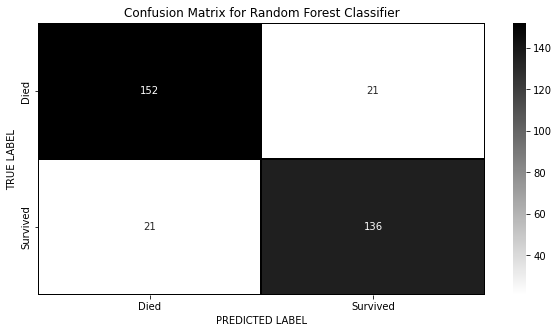

In [87]:
# Let's plot confusion matrix for Random Forest Classifier

cm = confusion_matrix(y_test,pred)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="binary", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')

In [88]:
for i in range(4,10):
    rfc_accscore = cross_val_score(rfc, x, y, cv=i)
    rfc_cvscore = rfc_accscore.mean()
    print("At cv=",i)
    print("Accuracy score is:", rfc_acc*100)
    print("Cross Validation score is:", rfc_cvscore*100)

At cv= 4
Accuracy score is: 87.27272727272727
Cross Validation score is: 85.16323822163238
At cv= 5
Accuracy score is: 87.27272727272727
Cross Validation score is: 84.34578663345788
At cv= 6
Accuracy score is: 87.27272727272727
Cross Validation score is: 85.24590163934427
At cv= 7
Accuracy score is: 87.27272727272727
Cross Validation score is: 84.88777676675767
At cv= 8
Accuracy score is: 87.27272727272727
Cross Validation score is: 85.62096688881837
At cv= 9
Accuracy score is: 87.27272727272727
Cross Validation score is: 84.60837887067395


In [89]:
cvscore = cross_val_score(dtc, x, y, cv=6).mean()
print(f"Accuracy= {rfc_acc*100}, cross_val_score= {rfc_cvscore*100} & difference= {(rfc_acc*100)-(rfc_cvscore*100)}")

Accuracy= 87.27272727272727, cross_val_score= 84.60837887067395 & difference= 2.664348402053321


# K-Neighbors Classifier

In [90]:
knc.fit(x_train,y_train)
pred = knc.predict(x_test)
knc_acc = accuracy_score(y_test,pred)
knc_acc

print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[142  31]
 [ 25 132]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       173
           1       0.81      0.84      0.83       157

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



Text(0.5, 1.0, 'Confusion Matrix for K-Neighbors Classifier')

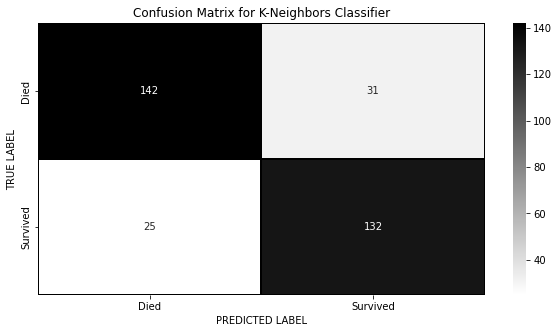

In [91]:
# Let's plot confusion matrix for K-Neighbors Classifier

cm = confusion_matrix(y_test,pred)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="binary", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for K-Neighbors Classifier')

In [92]:
for i in range(4,10):
    knc_accscore = cross_val_score(knc, x, y, cv=i)
    knc_cvscore = knc_accscore.mean()
    print("At cv=",i)
    print("Accuracy score is:", knc_acc*100)
    print("Cross Validation score is:", knc_cvscore*100)

At cv= 4
Accuracy score is: 83.03030303030303
Cross Validation score is: 82.15560716655608
At cv= 5
Accuracy score is: 83.03030303030303
Cross Validation score is: 82.70402656704027
At cv= 6
Accuracy score is: 83.03030303030303
Cross Validation score is: 82.78688524590164
At cv= 7
Accuracy score is: 83.03030303030303
Cross Validation score is: 82.8836238071907
At cv= 8
Accuracy score is: 83.03030303030303
Cross Validation score is: 82.33894001904157
At cv= 9
Accuracy score is: 83.03030303030303
Cross Validation score is: 82.5136612021858


In [93]:
cvscore = cross_val_score(knc, x, y, cv=5).mean()
print(f"Accuracy= {knc_acc*100}, cross_val_score= {knc_cvscore*100} & difference= {(knc_acc*100)-(knc_cvscore*100)}")

Accuracy= 83.03030303030303, cross_val_score= 82.5136612021858 & difference= 0.5166418281172298


# Gaussian Naive Bayes

In [94]:
gnb.fit(x_train,y_train)
pred = gnb.predict(x_test)
gnb_acc = accuracy_score(y_test,pred)
gnb_acc

print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[136  37]
 [ 29 128]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       173
           1       0.78      0.82      0.80       157

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



Text(0.5, 1.0, 'Confusion Matrix for Gaussian Naive Bayes')

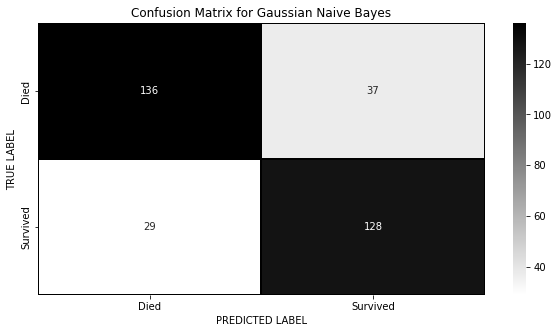

In [95]:
# Let's plot confusion matrix for Gaussian Naive Bayes

cm = confusion_matrix(y_test,pred)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="binary", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gaussian Naive Bayes')

In [96]:
for i in range(4,10):
    gnb_accscore = cross_val_score(gnb, x, y, cv=i)
    gnb_cvscore = gnb_accscore.mean()
    print("At cv=",i)
    print("Accuracy score is:", gnb_acc*100)
    print("Cross Validation score is:", gnb_cvscore*100)

At cv= 4
Accuracy score is: 80.0
Cross Validation score is: 78.05507631055076
At cv= 5
Accuracy score is: 80.0
Cross Validation score is: 78.1486093814861
At cv= 6
Accuracy score is: 80.0
Cross Validation score is: 78.41530054644808
At cv= 7
Accuracy score is: 80.0
Cross Validation score is: 77.87207484659714
At cv= 8
Accuracy score is: 80.0
Cross Validation score is: 77.87739342007828
At cv= 9
Accuracy score is: 80.0
Cross Validation score is: 77.959927140255


In [97]:
cvscore = cross_val_score(gnb, x, y, cv=8).mean()
print(f"Accuracy= {gnb_acc*100}, cross_val_score= {gnb_cvscore*100} & difference= {(gnb_acc*100)-(gnb_cvscore*100)}")

Accuracy= 80.0, cross_val_score= 77.959927140255 & difference= 2.0400728597449955


# Ada Boost Classifier

In [98]:
ada.fit(x_train,y_train)
pred = ada.predict(x_test)
ada_acc = accuracy_score(y_test,pred)
ada_acc

print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[140  33]
 [ 27 130]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       173
           1       0.80      0.83      0.81       157

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



Text(0.5, 1.0, 'Confusion Matrix for Ada Boost Classifier')

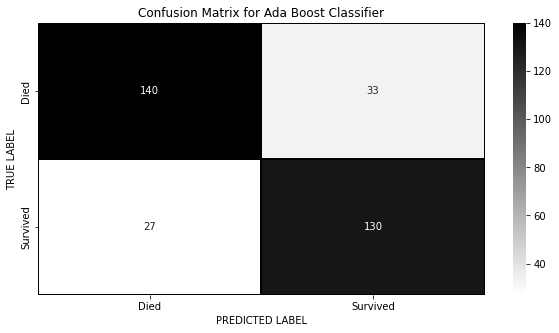

In [99]:
# Let's plot confusion matrix for Ada Boost Classifier

cm = confusion_matrix(y_test,pred)

x_axis_labels = ["Died","Survived"]
y_axis_labels = ["Died","Survived"]

f , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="binary", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Ada Boost Classifier')

In [100]:
for i in range(4,10):
    ada_accscore = cross_val_score(ada, x, y, cv=i)
    ada_cvscore = gnb_accscore.mean()
    print("At cv=",i)
    print("Accuracy score is:", ada_acc*100)
    print("Cross Validation score is:", ada_cvscore*100)

At cv= 4
Accuracy score is: 81.81818181818183
Cross Validation score is: 77.959927140255
At cv= 5
Accuracy score is: 81.81818181818183
Cross Validation score is: 77.959927140255
At cv= 6
Accuracy score is: 81.81818181818183
Cross Validation score is: 77.959927140255
At cv= 7
Accuracy score is: 81.81818181818183
Cross Validation score is: 77.959927140255
At cv= 8
Accuracy score is: 81.81818181818183
Cross Validation score is: 77.959927140255
At cv= 9
Accuracy score is: 81.81818181818183
Cross Validation score is: 77.959927140255


In [101]:
cvscore = cross_val_score(ada, x, y, cv=8).mean()
print(f"Accuracy= {ada_acc*100}, cross_val_score= {ada_cvscore*100} & difference= {(ada_acc*100)-(ada_cvscore*100)}")

Accuracy= 81.81818181818183, cross_val_score= 77.959927140255 & difference= 3.8582546779268228


# Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score

<b> From the observation of accuracy and cross validation score and their difference we can predict that knn is the best model.</b>

In [103]:
# K-Neighbors Classifier

parameters = {
            'weights':['uniform', 'distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            }             

In [104]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)

In [105]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'weights': ['uniform', 'distance']})

In [106]:
GCV.best_params_

{'algorithm': 'auto', 'weights': 'distance'}

In [107]:
GCV_pred = GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8515151515151516

# Plotting ROC And Comparing AUC For All The Models Used

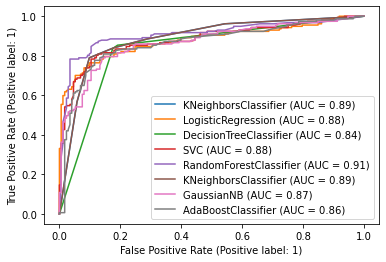

In [108]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(knc,x_test,y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(dtc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rfc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(gnb, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ada, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')
plt.show()

# Plotting ROC-AUC Curve For Best Model

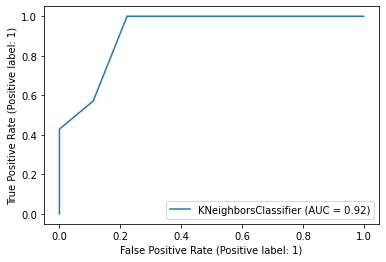

In [109]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection

x,y = datasets.make_classification (random_state=46)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state=46)
titanic = KNeighborsClassifier()
titanic.fit(x_train, y_train)
metrics.plot_roc_curve(titanic, x_test, y_test)
plt.show()

In [111]:
import joblib
joblib.dump(GCV_pred,"Titanic_Project.pkl")

['Titanic_Project.pkl']